In [1]:
import pandas as pd
import numpy as np
import pdb, argparse
import os, pdb, math, itertools
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from kdutils.macro2 import *

In [3]:
method = 'cicso0'
instruments = 'ims'
period = 5
name = 'lgbm'
task_id = str(INDEX_MAPPING[INSTRUMENTS_CODES[instruments]])

In [4]:
dirs = os.path.join(base_path, method, instruments, 'temp', "model", task_id,
                    str(period))

In [5]:
filename = os.path.join(dirs, "{0}_predict_data.feather".format(name))
filename

'./records/cicso0/ims/temp/model/200037/5/lgbm_predict_data.feather'

In [6]:
predict_data = pd.read_feather(filename)
predict_data.head()

,trade_time,code,nxt1_ret_5h,predict
0,2024-12-04 10:43:00,IM,-0.000850,-0.000013
1,2024-12-04 10:44:00,IM,-0.000477,-0.000013
2,2024-12-04 10:45:00,IM,-0.001953,-0.000013
3,2024-12-04 10:46:00,IM,-0.003197,-0.000013
4,2024-12-04 10:47:00,IM,-0.003587,-0.000013


In [7]:
is_on_mark = predict_data['trade_time'].dt.minute % int(period) == 0
predict_data = predict_data[is_on_mark]
predict_data.replace([np.inf, -np.inf], np.nan, inplace=True)
predict_data.dropna(inplace=True)
predict_data.head()

,trade_time,code,nxt1_ret_5h,predict
2,2024-12-04 10:45:00,IM,-0.001953,-0.000013
7,2024-12-04 10:50:00,IM,-0.002708,-0.000013
12,2024-12-04 10:55:00,IM,0.004226,-0.000013
17,2024-12-04 11:00:00,IM,0.000133,-0.000013
22,2024-12-04 11:05:00,IM,0.002810,-0.000013


In [8]:
from lib.cux001 import FactorEvaluate1

In [9]:
evaluate1 = FactorEvaluate1(factor_data=predict_data,
                                factor_name='predict',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression=name)

In [10]:
stats_dt = evaluate1.run()

/workspace/worker/env/chaos/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


In [11]:
stats_dt

{'total_ret': 0.0,
 'avg_ret': 0.0,
 'max_dd': 0.0,
 'calmar': nan,
 'sharpe1': 0,
 'sharpe2': 0,
 'turnover': 0.0,
 'win_rate': 0.0,
 'profit_ratio': inf,
 'ic_mean': nan,
 'ic_std': nan,
 'ic_ir': nan,
 'factor_autocorr': 1.0,
 'ret_autocorr': -0.03779081187119369}

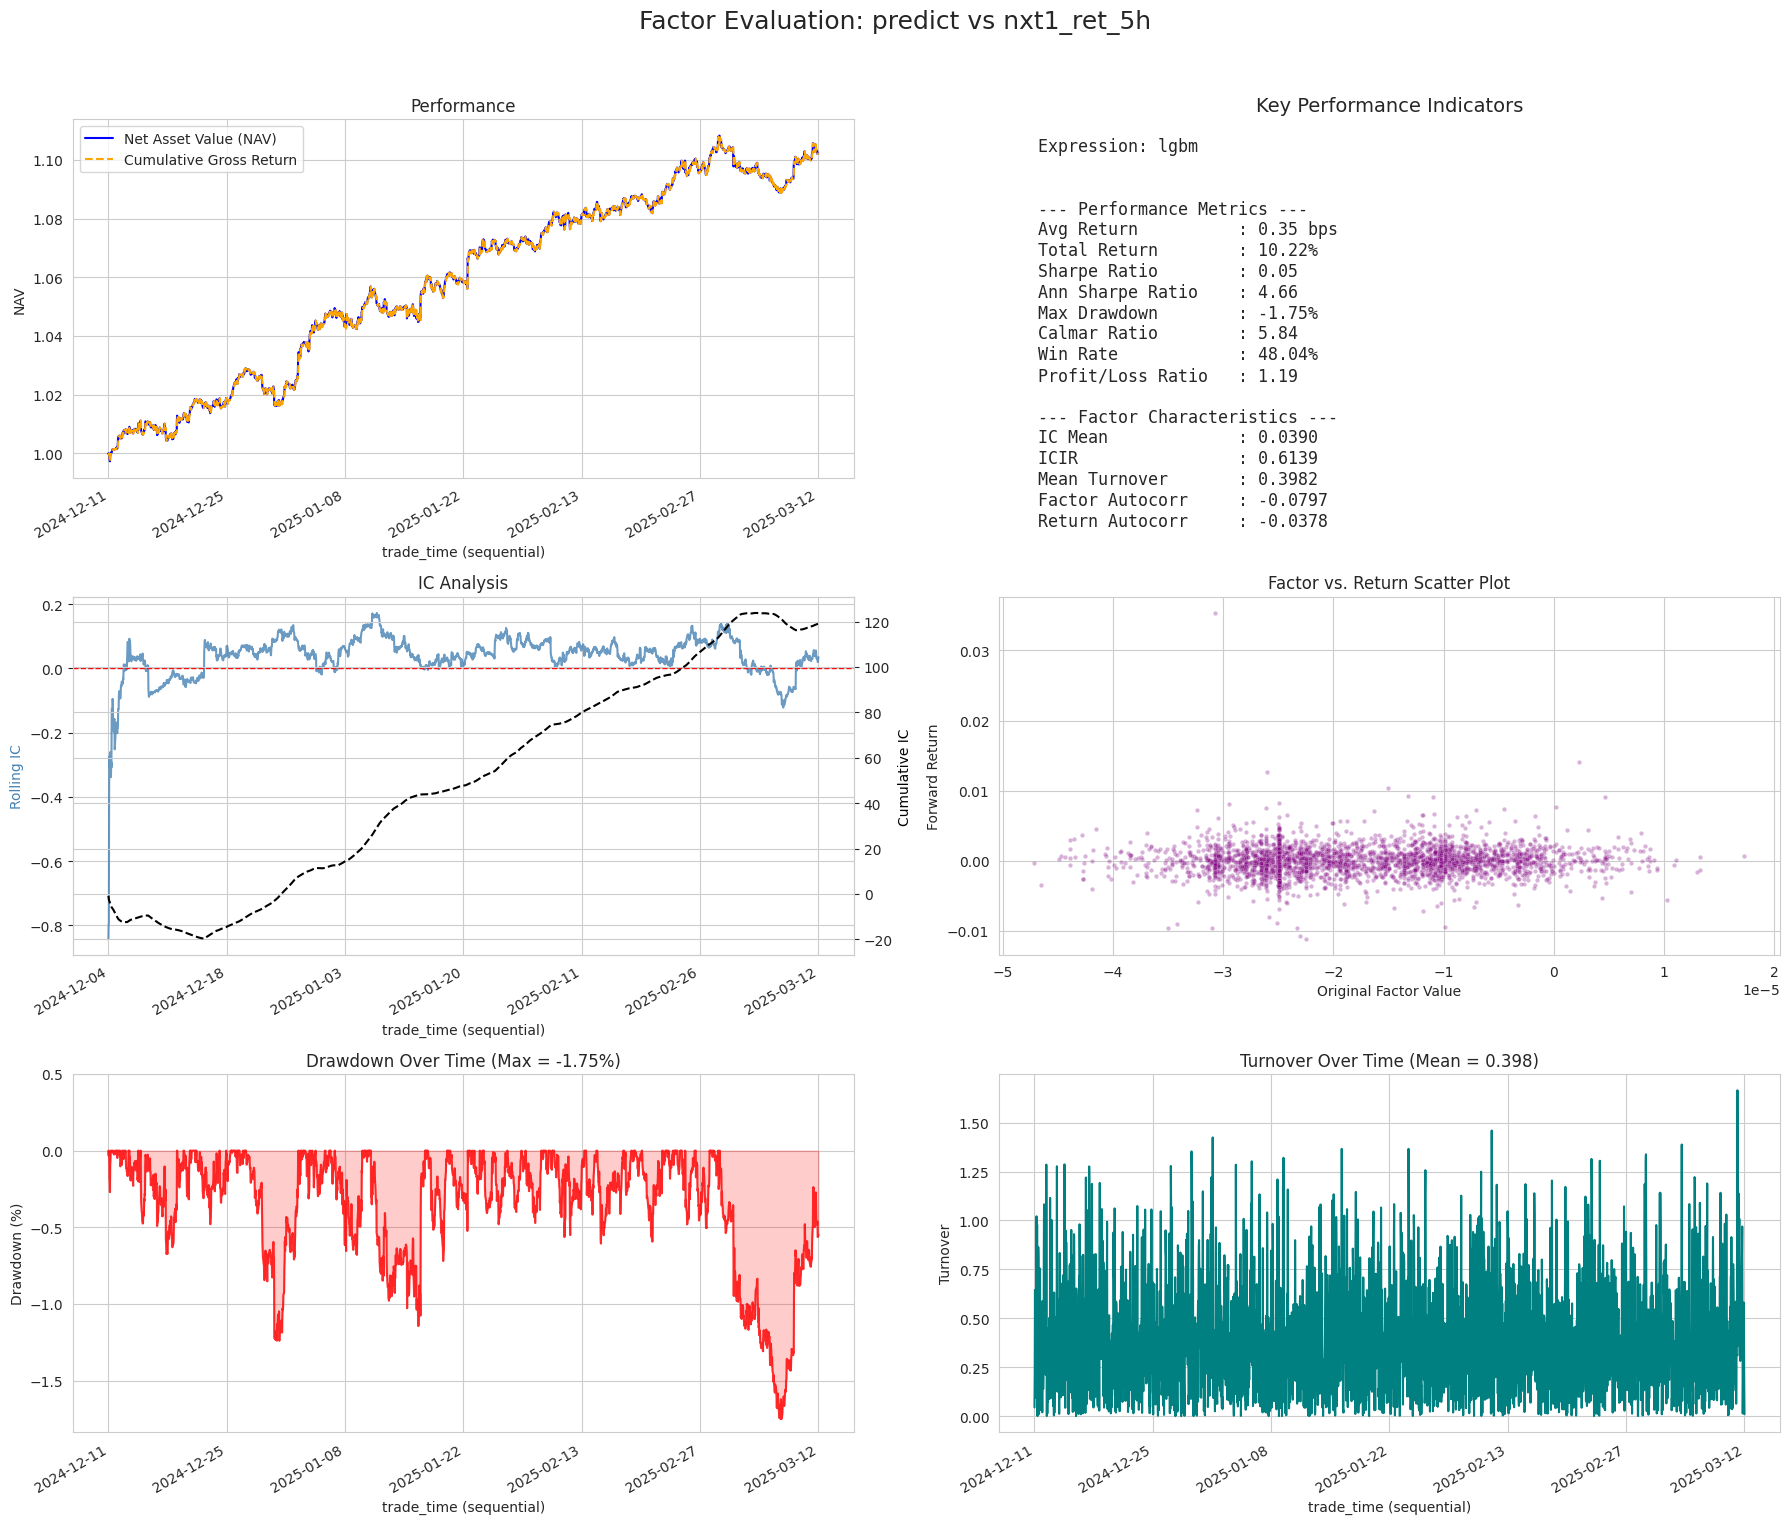

In [12]:
evaluate1.plot_results()

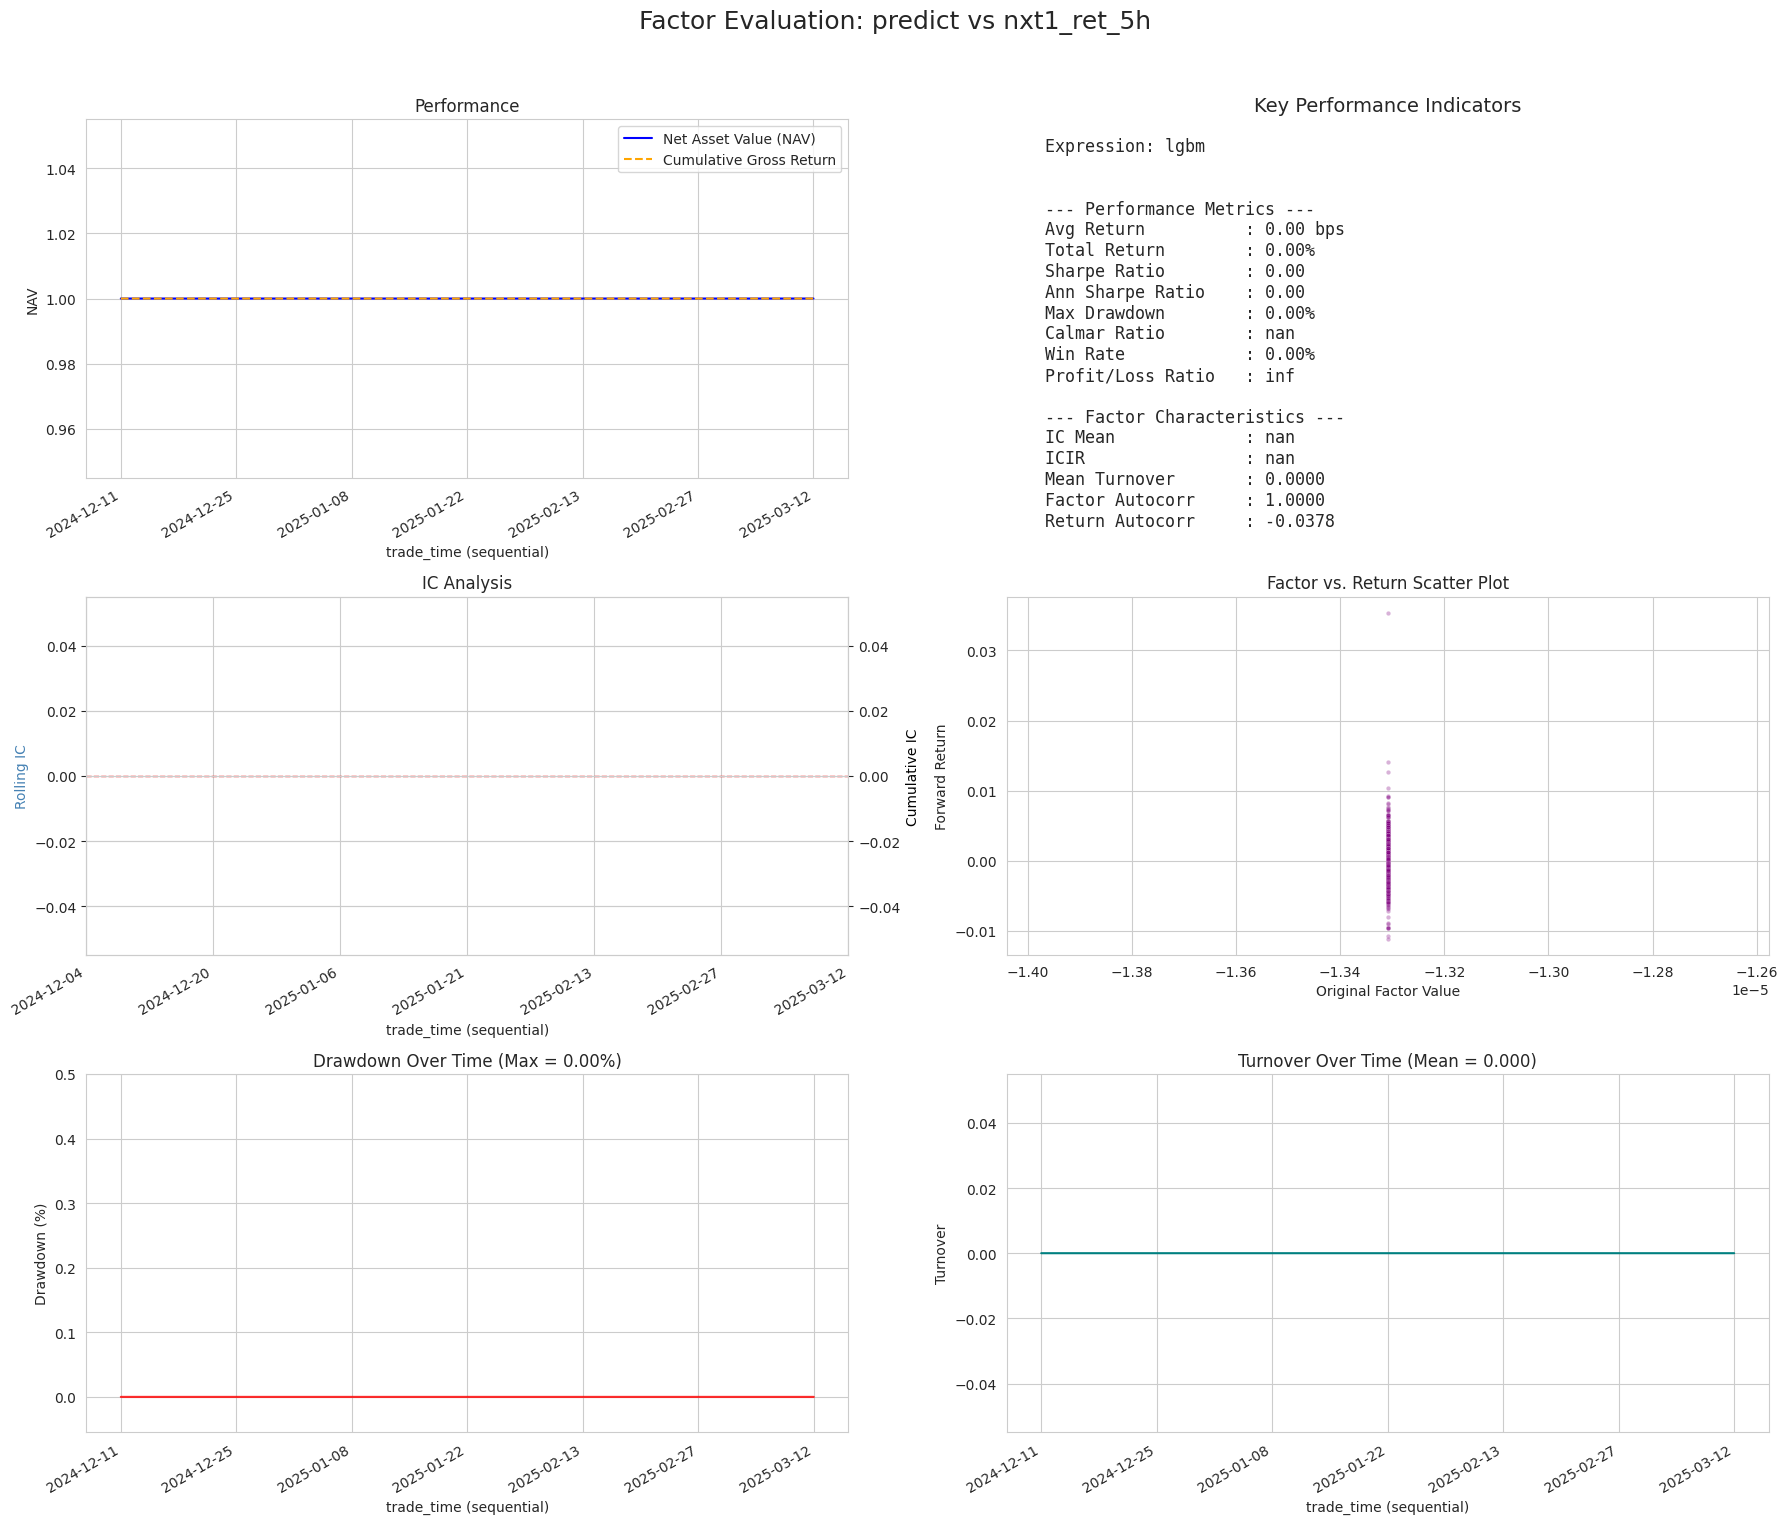

In [12]:
evaluate1.plot_results()